# GrandientTape  

forward propagation이 진행되면서 나중에 backprogation을 할 때 필요한 값을 저장  
즉, prediction을 구하는 과정과 loss를 구하는 과정이 tf.GradientTape의 대상이 됨

In [5]:
import tensorflow as tf

test_list1 = [1, 2, 3]
test_list2 = [10, 20, 30]

t1 = tf.constant(test_list1, dtype=tf.float32)
t2 = tf.Variable(test_list2, dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2

# 미분을 하고자 하는 타겟(t3)을 설정 : loss / 학습시키고자하는 variable tensor   
gradients = tape.gradient(t3, [t1, t2])
# gradient[0]/[1] : t3에 대한 t1/t2의 gradient
# gradients[0]은 input data로 고정된 값이기 때문에 backprogation이 필요없기 때문에 None
print(gradients[0])
print(gradients[1])


None
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


# Simple Linear Regression Example  

predictor가 y = wx + b인 regression  
weight,bias는 모두 1개, loss는 mean squared error를 사용. 

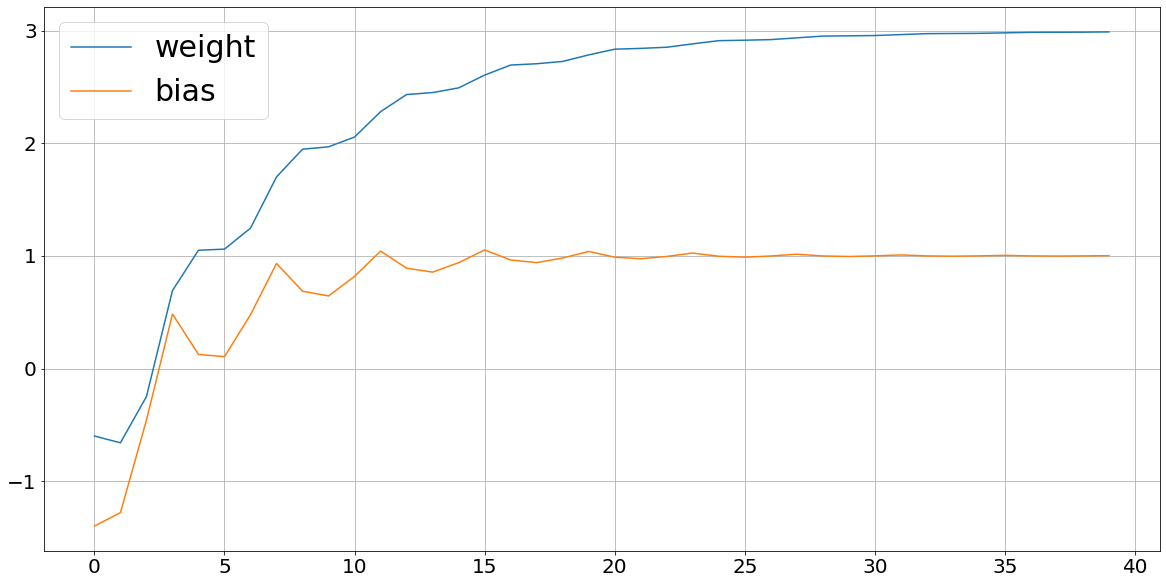

In [9]:
import matplotlib.pyplot as plt 

x_data = tf.constant([-1, -0.5, 0.5, 1], dtype=tf.float32)
y_data = 3*x_data + 1

w = tf.Variable(-1.)
b = tf.Variable(-1.)

LR = 0.1
w_trace, b_trace = [], []

for epoch in range(10):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            # 나중에 model을 이용할 때 predictions = model
            predictions = w*x + b
            loss = (predictions - y)**2
            
        gradients = tape.gradient(loss, [w, b])

        w = tf.Variable(w - LR*gradients[0])
        b = tf.Variable(b - LR*gradients[1])
        w_trace.append(w.numpy())
        b_trace.append(b.numpy())

fig,ax = plt.subplots(figsize=(20,10))

ax.plot(w_trace,label='weight')
ax.plot(b_trace,label='bias')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()